In [1]:
#Import Library#
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
#Import Data#
df_customer = pd.read_csv('Case Study - Customer.csv', sep = ';')
df_product = pd.read_csv('Case Study - Product.csv', sep = ';')
df_store = pd.read_csv('Case Study - Store.csv', sep = ';')
df_transaction = pd.read_csv('Case Study - Transaction.csv', sep = ';')

In [5]:
#Data Preparation and Data Cleansing#
#Mengecek nilai yang hilang
missing_values1 = df_customer.isnull().sum()
missing_values2 = df_product.isnull().sum()
missing_values3 = df_store.isnull().sum()
missing_values4 = df_transaction.isnull().sum()

In [6]:
#Mengecek duplikat
duplikat_rows1 = df_customer.duplicated()
duplikat_rows2 = df_product.duplicated()
duplikat_rows3 = df_store.duplicated()
duplikat_rows4 = df_transaction.duplicated()

In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [8]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [10]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [11]:
#Menggabungkan data#
merged_data1 = pd.merge(df_customer, df_transaction, on = 'CustomerID')
merged_data2 = pd.merge(merged_data1, df_store, on = 'StoreID')
merged = pd.merge(merged_data2, df_product, on = 'ProductID')
merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000


In [12]:
#Time Series#
#Mengubah tipe data tanggal ke datetime
merged['Date'] = pd.to_datetime(merged['Date'])
merged['Longitude'] = merged['Longitude'].apply(lambda x: x.replace(',','.')).astype(float)
merged['Latitude'] = merged['Latitude'].apply(lambda x: x.replace(',','.')).astype(float)

In [13]:
#Membuat Data Time Series
daily_data = merged.groupby('Date')['Qty'].sum().reset_index()
data = daily_data.set_index('Date')
data2 = data.resample('D').sum()
data2.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


In [14]:
#Pisahkan data
train_size = int(len(data2)*0.8)
train_data, test_data = data2[:train_size], data2[train_size:]
print(train_data.shape, test_data.shape)

(292, 1) (73, 1)


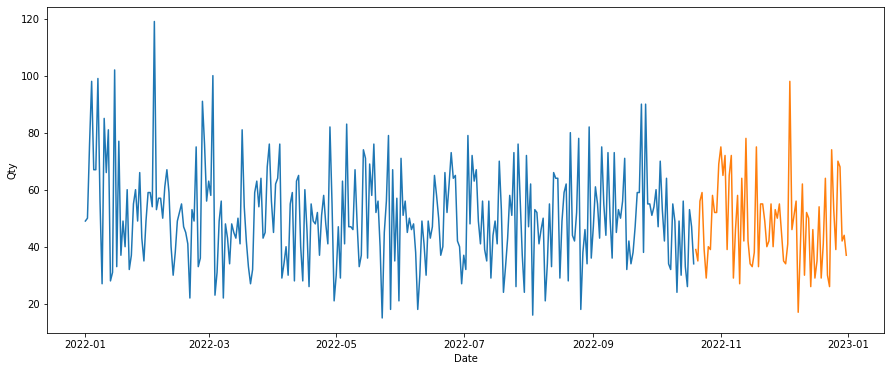

In [15]:
#Import Library#
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

In [16]:
#Membuat Model ARIMA#
from statsmodels.tsa.arima.model import ARIMA
#1. Tentukan nilai p, d dan q
p = 2
d = 2
q = 2
#2. Buat model ARIMA
model = ARIMA(train_data, order=(p, d, q))
#3. Latih model dengan data
model_fit = model.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [17]:
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 236.9164253849099


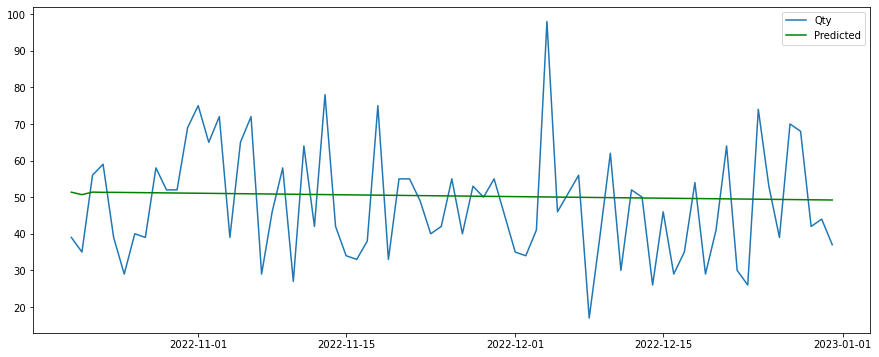

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color="green", label='Predicted')
plt.legend()
plt.show()

In [19]:
#Clustering#
#Menggabungkan data CustomerID dan menghitung metrik
aggregated = merged.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()
aggregated

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [20]:
Y = aggregated[['TransactionID','Qty','TotalAmount']]
#Clustering KMeans#
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3, random_state=42)
aggregated['cluster']= Kmeans.fit_predict(Y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


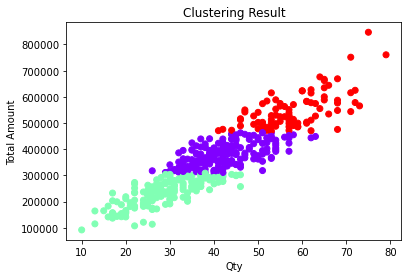

In [21]:
#Membuat Plot
import matplotlib.pyplot as plt
plt.scatter(aggregated['Qty'], aggregated['TotalAmount'], c=aggregated['cluster'], cmap='rainbow')
plt.title('Clustering Result')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.show()

In [22]:
#Within-Cluster Sum of Squared (WCSS)#
wcss = []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init = 'k-means++', n_init = 10, max_iter=100, tol = 0.0001, random_state = 100)
    model1.fit(Y)
    wcss.append(model1.inertia_)
print(wcss)

[6928031859602.738, 2434662706463.3955, 1233033389389.9624, 776512017046.2605, 504081360603.5857, 382593519595.5847, 277766901361.2123, 212941531954.89276, 171724378723.10638, 136882282484.87318]


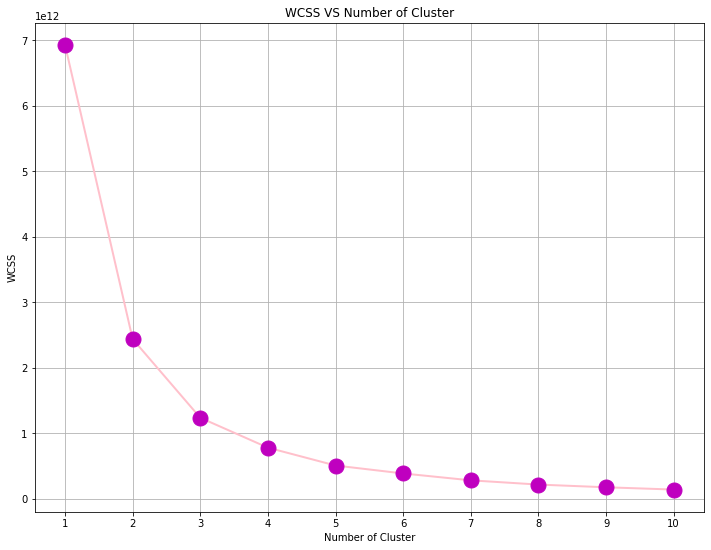

In [23]:
plt.figure(figsize=(12,9))
plt.plot(list(range(1,11)), wcss, color = 'pink', marker = 'o', linewidth = 2, markersize = 15, markerfacecolor = 'm',
        markeredgecolor= 'm')
plt.title('WCSS VS Number of Cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.grid()
plt.show()

In [48]:
#Model Cluster dengan K optimal
model1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(Y)
labels1 = model1.labels_

In [51]:
#Input Cluster ke Dataset
df_cluster['cluster'] = model1.labels_
df_cluster.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [43]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster, hue='cluster', palette='Set1')
plt.show()

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

<Figure size 432x432 with 0 Axes>